In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.datasets import load_sample_images

##### Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and 
      write a helper function to plot the image using matplotlib.[Hint:Explore datasets module from scikit learn]

In [9]:
digits_loaded = load_digits()


In [10]:
# from matplotlib import pyplot as plt
# fig = plt.figure(figsize=(6, 6))  
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# for i in range(64):
#     ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
#     ax.imshow(digits_loaded.images[i], cmap=plt.cm.binary, interpolation='nearest')
#     ax.text(0, 7, str(digits_loaded.target[i]))


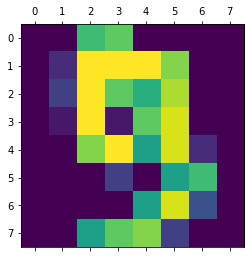

In [11]:
plt.matshow(digits_loaded.images[9])
plt.show()

In [12]:
digits_loaded.data.shape

(1797, 64)

In [13]:
digits_loaded.data.reshape(-1,1)

array([[ 0.],
       [ 0.],
       [ 5.],
       ...,
       [12.],
       [ 1.],
       [ 0.]])

In [14]:
digits_loaded.target.shape

(1797,)

In [15]:
digits=pd.DataFrame(digits_loaded.data)
target=pd.DataFrame(digits_loaded.target)

In [16]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1797 non-null   int32
dtypes: int32(1)
memory usage: 7.1 KB


In [17]:
target[0].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: 0, dtype: int64

##### 2.Make a train -test split with 20% of the data set aside for testing. 
     Fit a logistic regression model and observe the accuracy.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X=digits
Y=target

In [20]:
lr=LogisticRegression()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
trainx,testx,trainy,testy=train_test_split(X,Y,test_size=0.2,random_state=100)

In [23]:
lr.fit(trainx,trainy)

c:\users\welcome\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\welcome\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predlr=lr.predict(testx)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(predlr,testy)

0.9611111111111111

In [26]:
confusion_matrix(testy,predlr)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 37,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 25,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 34]], dtype=int64)

##### 3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset.
     Find out the number of components in the projected subspace.
##### 4.Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model andcomment on the accuracy.

In [27]:
from sklearn.preprocessing import StandardScaler 
  
scalar = StandardScaler() 
scalar.fit(X) 
scaled_data = scalar.transform(X) 
  

In [28]:
from sklearn.decomposition import PCA
pca = PCA()

In [29]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [30]:
pca.singular_values_

array([1.14853027e+02, 1.02374513e+02, 9.62107804e+01, 8.43999988e+01,
       7.29901087e+01, 6.79661076e+01, 6.57357810e+01, 6.09535699e+01,
       5.73285263e+01, 5.66919151e+01, 5.52207542e+01, 5.31496988e+01,
       4.99411577e+01, 4.94101975e+01, 4.87181644e+01, 4.58066808e+01,
       4.41169066e+01, 4.23745489e+01, 4.18329026e+01, 4.04030531e+01,
       3.84396124e+01, 3.73396975e+01, 3.57485095e+01, 3.40493828e+01,
       3.26972794e+01, 3.21775889e+01, 3.07572734e+01, 3.02837051e+01,
       2.95703806e+01, 2.86052359e+01, 2.82021522e+01, 2.75400136e+01,
       2.67730260e+01, 2.65031620e+01, 2.54609018e+01, 2.50218124e+01,
       2.39581918e+01, 2.29813625e+01, 2.23014224e+01, 2.15373702e+01,
       2.10974689e+01, 2.08631842e+01, 1.97680870e+01, 1.93277180e+01,
       1.89568789e+01, 1.84646678e+01, 1.77856004e+01, 1.74091710e+01,
       1.68552602e+01, 1.60322561e+01, 1.54675990e+01, 1.49391305e+01,
       1.46394964e+01, 1.41756213e+01, 1.35682641e+01, 1.32944400e+01,
      

In [31]:
pca.explained_variance_

array([7.34477606e+00, 5.83549054e+00, 5.15396118e+00, 3.96623597e+00,
       2.96634520e+00, 2.57204442e+00, 2.40600941e+00, 2.06867355e+00,
       1.82993314e+00, 1.78951739e+00, 1.69784616e+00, 1.57287889e+00,
       1.38870781e+00, 1.35933609e+00, 1.32152536e+00, 1.16829176e+00,
       1.08368678e+00, 9.99778617e-01, 9.74382931e-01, 9.08912418e-01,
       8.22719264e-01, 7.76310139e-01, 7.11556753e-01, 6.45523648e-01,
       5.95273988e-01, 5.76501797e-01, 5.26731552e-01, 5.10636301e-01,
       4.86863813e-01, 4.55601071e-01, 4.42851552e-01, 4.22300863e-01,
       3.99106303e-01, 3.91101111e-01, 3.60945168e-01, 3.48603059e-01,
       3.19596300e-01, 2.94066271e-01, 2.76922851e-01, 2.58273004e-01,
       2.47830286e-01, 2.42356600e-01, 2.17581996e-01, 2.07995927e-01,
       2.00090902e-01, 1.89835165e-01, 1.76128942e-01, 1.68752359e-01,
       1.58184741e-01, 1.43114274e-01, 1.33210813e-01, 1.24263708e-01,
       1.19328984e-01, 1.11886547e-01, 1.02504338e-01, 9.84087608e-02,
      

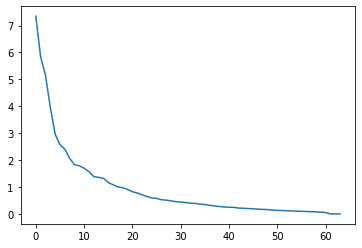

In [32]:
plt.plot(pca.explained_variance_)

In [33]:
pca.explained_variance_ratio_

array([1.20339161e-01, 9.56105440e-02, 8.44441489e-02, 6.49840791e-02,
       4.86015488e-02, 4.21411987e-02, 3.94208280e-02, 3.38938092e-02,
       2.99822101e-02, 2.93200255e-02, 2.78180546e-02, 2.57705509e-02,
       2.27530332e-02, 2.22717974e-02, 2.16522943e-02, 1.91416661e-02,
       1.77554709e-02, 1.63806927e-02, 1.59646017e-02, 1.48919119e-02,
       1.34796957e-02, 1.27193137e-02, 1.16583735e-02, 1.05764660e-02,
       9.75315947e-03, 9.44558990e-03, 8.63013827e-03, 8.36642854e-03,
       7.97693248e-03, 7.46471371e-03, 7.25582151e-03, 6.91911245e-03,
       6.53908536e-03, 6.40792574e-03, 5.91384112e-03, 5.71162405e-03,
       5.23636803e-03, 4.81807586e-03, 4.53719260e-03, 4.23162753e-03,
       4.06053070e-03, 3.97084808e-03, 3.56493303e-03, 3.40787181e-03,
       3.27835335e-03, 3.11032007e-03, 2.88575294e-03, 2.76489264e-03,
       2.59174941e-03, 2.34483006e-03, 2.18256858e-03, 2.03597635e-03,
       1.95512426e-03, 1.83318499e-03, 1.67946387e-03, 1.61236062e-03,
      

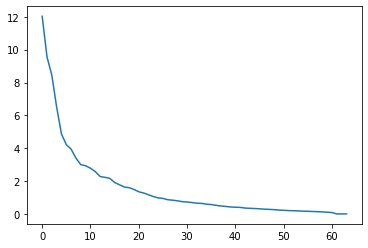

In [34]:
plt.plot(pca.explained_variance_ratio_*100)

In [35]:
transformed=pd.DataFrame(pca.fit_transform(scaled_data))

In [36]:
transformed.shape

(1797, 64)

In [37]:
pca1 = PCA(20)

In [38]:
# scaled_data=scaled_data.reshape(-1,1)

In [39]:
pca1.fit(scaled_data)
transformed1=pca1.transform(scaled_data)
A=pd.DataFrame(transformed1)

In [40]:
pca1.explained_variance_ratio_*100

array([12.0339161 ,  9.5610544 ,  8.44441489,  6.4984079 ,  4.86015483,
        4.21411968,  3.94208219,  3.38937934,  2.99821963,  2.93200121,
        2.78179841,  2.57704881,  2.27525584,  2.22717506,  2.16519086,
        1.91405925,  1.7752808 ,  1.63782881,  1.59582455,  1.48898272])

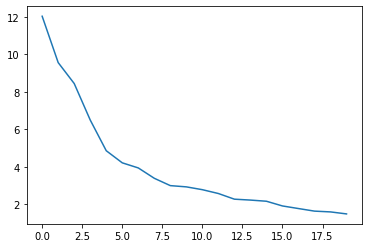

In [41]:
plt.plot(pca1.explained_variance_ratio_*100)

In [42]:
# pca1.explained_variance_[1]

In [43]:
pca1.explained_variance_

array([7.34477606, 5.83549054, 5.15396118, 3.96623596, 2.96634517,
       2.5720443 , 2.40600904, 2.06867258, 1.8299323 , 1.78951657,
       1.69784185, 1.57287505, 1.38867884, 1.35933323, 1.32150182,
       1.16822624, 1.08352425, 0.99963185, 0.97399499, 0.90878518])

In [44]:
pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732, 0.81933664, 0.83099501, 0.84157148, 0.85132464,
       0.86077023, 0.86940036, 0.87776679, 0.88574372, 0.89320844,
       0.90046426, 0.90738337, 0.91392246, 0.92033038, 0.92624422,
       0.93195585, 0.93719222, 0.94201029, 0.94654748, 0.95077911,
       0.95483964, 0.95881049, 0.96237542, 0.9657833 , 0.96906165,
       0.97217197, 0.97505772, 0.97782262, 0.98041436, 0.98275919,
       0.98494176, 0.98697774, 0.98893286, 0.99076605, 0.99244551,
       0.99405787, 0.9955355 , 0.99688668, 0.99813769, 0.99917465,
       1.        , 1.        , 1.        , 1.        ])

In [45]:
X1=A
X1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.914214,-0.954502,-3.946035,2.028723,-0.267170,0.530354,-1.415284,1.496073,0.124836,-0.822226,-0.499587,-0.789366,0.226884,-0.194988,0.836381,0.101512,0.184244,-0.091504,0.406606,0.433387
1,0.588979,0.924635,3.924755,-1.779853,-0.993496,-0.675690,1.878538,0.556565,1.079622,0.087407,-0.505532,0.641199,-0.046668,-0.393278,-0.740534,-0.208911,-0.089047,-0.425445,0.580859,-0.074592
2,1.302040,-0.317188,3.023331,-2.043373,-2.081110,0.935131,-1.296001,1.155997,0.786158,-1.099109,2.197742,-2.311033,-0.570462,-0.995854,-1.171374,0.391835,-0.253505,-0.463209,-1.094303,-1.140821
3,-3.020771,-0.868773,-0.801744,-2.187047,-0.556811,0.727058,0.959782,-1.382427,0.259087,0.744701,-1.065767,0.492098,-0.166463,1.008869,-0.144202,-0.998317,-0.949576,-0.399263,1.493932,0.314545
4,4.528950,-1.093478,0.973122,-1.419493,-1.715083,1.431666,1.073553,-0.968580,-1.660391,1.174133,-1.016655,-1.365830,-0.342300,-0.112774,0.734633,0.209057,-0.106936,-0.568714,1.598280,1.080826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.104331,0.255026,-3.765860,-1.946993,-0.190083,-0.555665,0.531203,0.476199,1.152304,-0.473260,-0.635033,0.803617,1.205727,-0.700546,0.189745,0.158470,0.499336,0.352984,-0.970804,0.809699
1793,2.423234,-1.429610,-3.045245,2.632090,-0.822907,0.004056,-1.106921,2.330873,0.569467,-1.654190,-0.460196,-0.530586,0.859463,0.885070,-0.701487,1.100697,0.305178,-0.312103,-0.303419,0.105034
1794,1.022597,-0.147910,2.469975,-0.620298,-0.972019,-0.007317,0.381091,0.528860,2.054738,-2.036920,-0.679289,0.397375,-0.409275,0.258497,0.335545,1.161479,1.124374,0.678961,-1.614688,0.192007
1795,1.076055,-0.380907,-2.455489,-1.312016,0.253502,-0.638343,1.034599,0.763553,1.077441,-0.334478,-0.979892,0.605536,0.168079,-0.760323,0.016512,0.156229,1.692924,0.817666,-1.753802,0.765968


In [46]:
trainx1,testx1,trainy,testy=train_test_split(X1,Y,test_size=0.2,random_state=100)

In [47]:
lr.fit(trainx1,trainy)

c:\users\welcome\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\welcome\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
predlr1=lr.predict(testx1)

##### 5.Compute the confusion matrix and count the number of instances that has gone wrong. 
     For each of the wrong sample,plot the digit along with predicted and original label

In [49]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(predlr1,testy)

0.9583333333333334

In [50]:
cm=confusion_matrix(testy,predlr1)
cm
# cm.ravel()

array([[41,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  1,  0, 24,  0],
       [ 0,  2,  0,  2,  0,  0,  0,  0,  0, 32]], dtype=int64)

In [51]:
# cm=confusion_matrix(testy,predlr1,labels=target[0].unique())
# cm

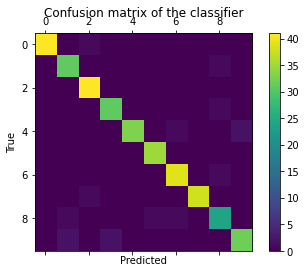

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [53]:
from sklearn.metrics import classification_report

C=classification_report(testy, predlr1) 
C

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        42\n           1       0.91      0.97      0.94        32\n           2       0.95      1.00      0.98        41\n           3       0.94      0.97      0.95        32\n           4       1.00      0.92      0.96        36\n           5       0.97      1.00      0.99        35\n           6       0.95      0.97      0.96        40\n           7       1.00      0.97      0.99        39\n           8       0.89      0.89      0.89        27\n           9       0.94      0.89      0.91        36\n\n    accuracy                           0.96       360\n   macro avg       0.96      0.96      0.96       360\nweighted avg       0.96      0.96      0.96       360\n'

In [56]:
# def perf_measure(testy,predlr1):
#     TP = 0
#     FP = 0
#     TN = 0
#     FN = 0

#     for i in range(len(predlr1)): 
#         if testy[i]==predlr1[i]==1:
#             TP += 1
#         if predlr1[i]==1 and testy[i]!=predlr1[i]:
#             FP += 1
#         if testy[i]==predlr1[i]==0:
#             TN += 1
#         if predlr1[i]==0 and testy[i]!=predlr1[i]:
#             FN += 1

#     return(TP, FP, TN, FN)

In [57]:
predlr1

array([9, 1, 0, 2, 4, 5, 7, 4, 7, 2, 4, 5, 7, 5, 9, 6, 1, 1, 5, 2, 8, 7,
       6, 6, 6, 7, 0, 2, 8, 3, 0, 9, 3, 9, 5, 5, 3, 6, 3, 6, 1, 1, 5, 2,
       0, 4, 8, 3, 7, 4, 1, 5, 5, 1, 4, 8, 5, 7, 3, 9, 6, 3, 5, 6, 2, 6,
       3, 6, 6, 6, 8, 4, 6, 0, 6, 6, 2, 1, 6, 3, 8, 3, 3, 1, 1, 4, 0, 5,
       5, 4, 1, 7, 0, 0, 8, 7, 4, 2, 7, 5, 4, 0, 9, 3, 4, 5, 7, 2, 5, 5,
       5, 2, 1, 3, 2, 0, 1, 9, 7, 3, 2, 1, 9, 6, 0, 7, 0, 7, 5, 0, 7, 6,
       0, 2, 8, 2, 0, 7, 6, 3, 4, 5, 0, 8, 9, 0, 8, 0, 3, 6, 8, 1, 4, 1,
       8, 9, 0, 0, 6, 2, 2, 7, 5, 9, 2, 4, 1, 5, 3, 4, 2, 0, 6, 9, 3, 1,
       2, 0, 7, 4, 4, 4, 3, 9, 5, 3, 4, 3, 2, 6, 2, 4, 9, 7, 2, 7, 1, 0,
       8, 3, 8, 6, 9, 9, 0, 3, 1, 5, 3, 8, 0, 6, 8, 6, 2, 9, 9, 2, 6, 2,
       1, 4, 4, 2, 8, 0, 7, 2, 7, 2, 6, 4, 0, 1, 0, 5, 0, 3, 3, 9, 0, 2,
       7, 0, 1, 2, 2, 7, 3, 2, 0, 2, 2, 5, 1, 2, 6, 7, 0, 5, 3, 3, 5, 2,
       2, 6, 4, 7, 9, 4, 0, 9, 0, 8, 7, 0, 9, 1, 0, 7, 1, 6, 0, 5, 9, 9,
       6, 8, 7, 4, 2, 2, 1, 0, 8, 1, 9, 6, 1, 8, 7,